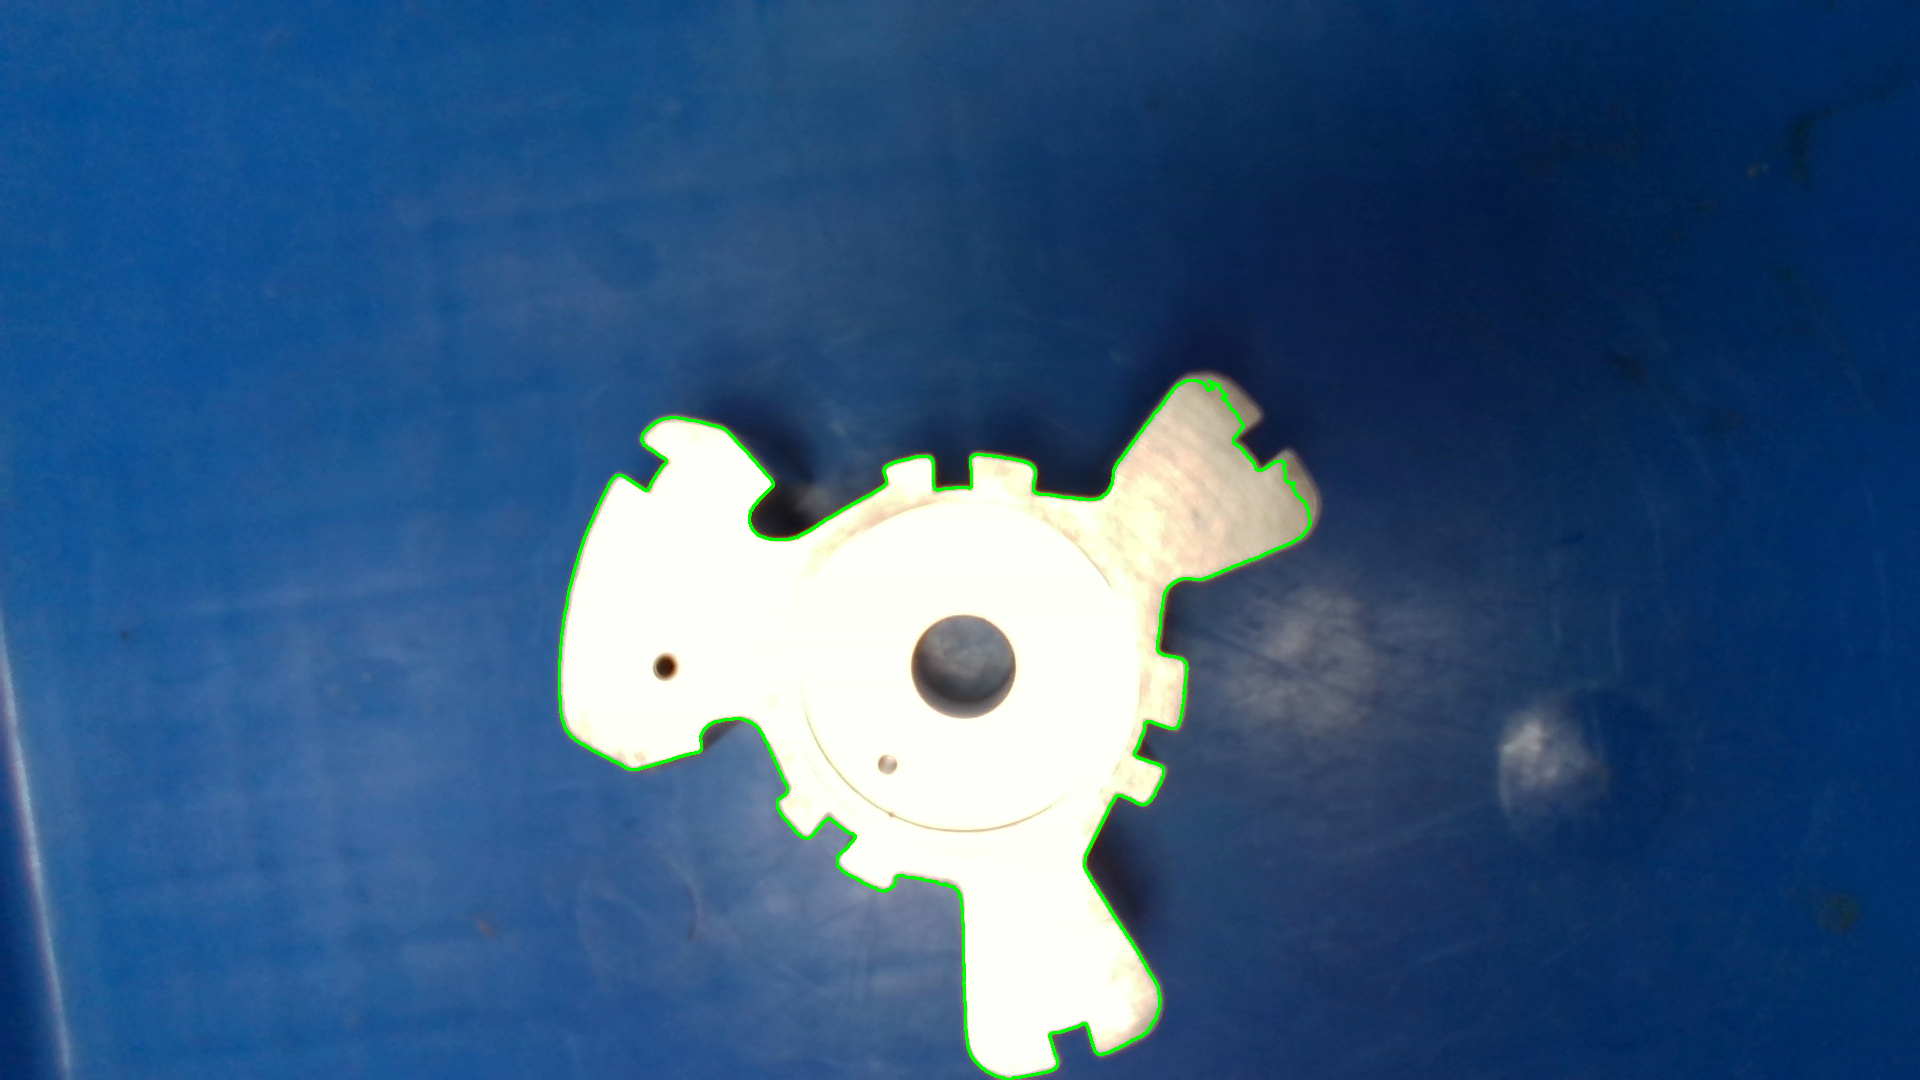

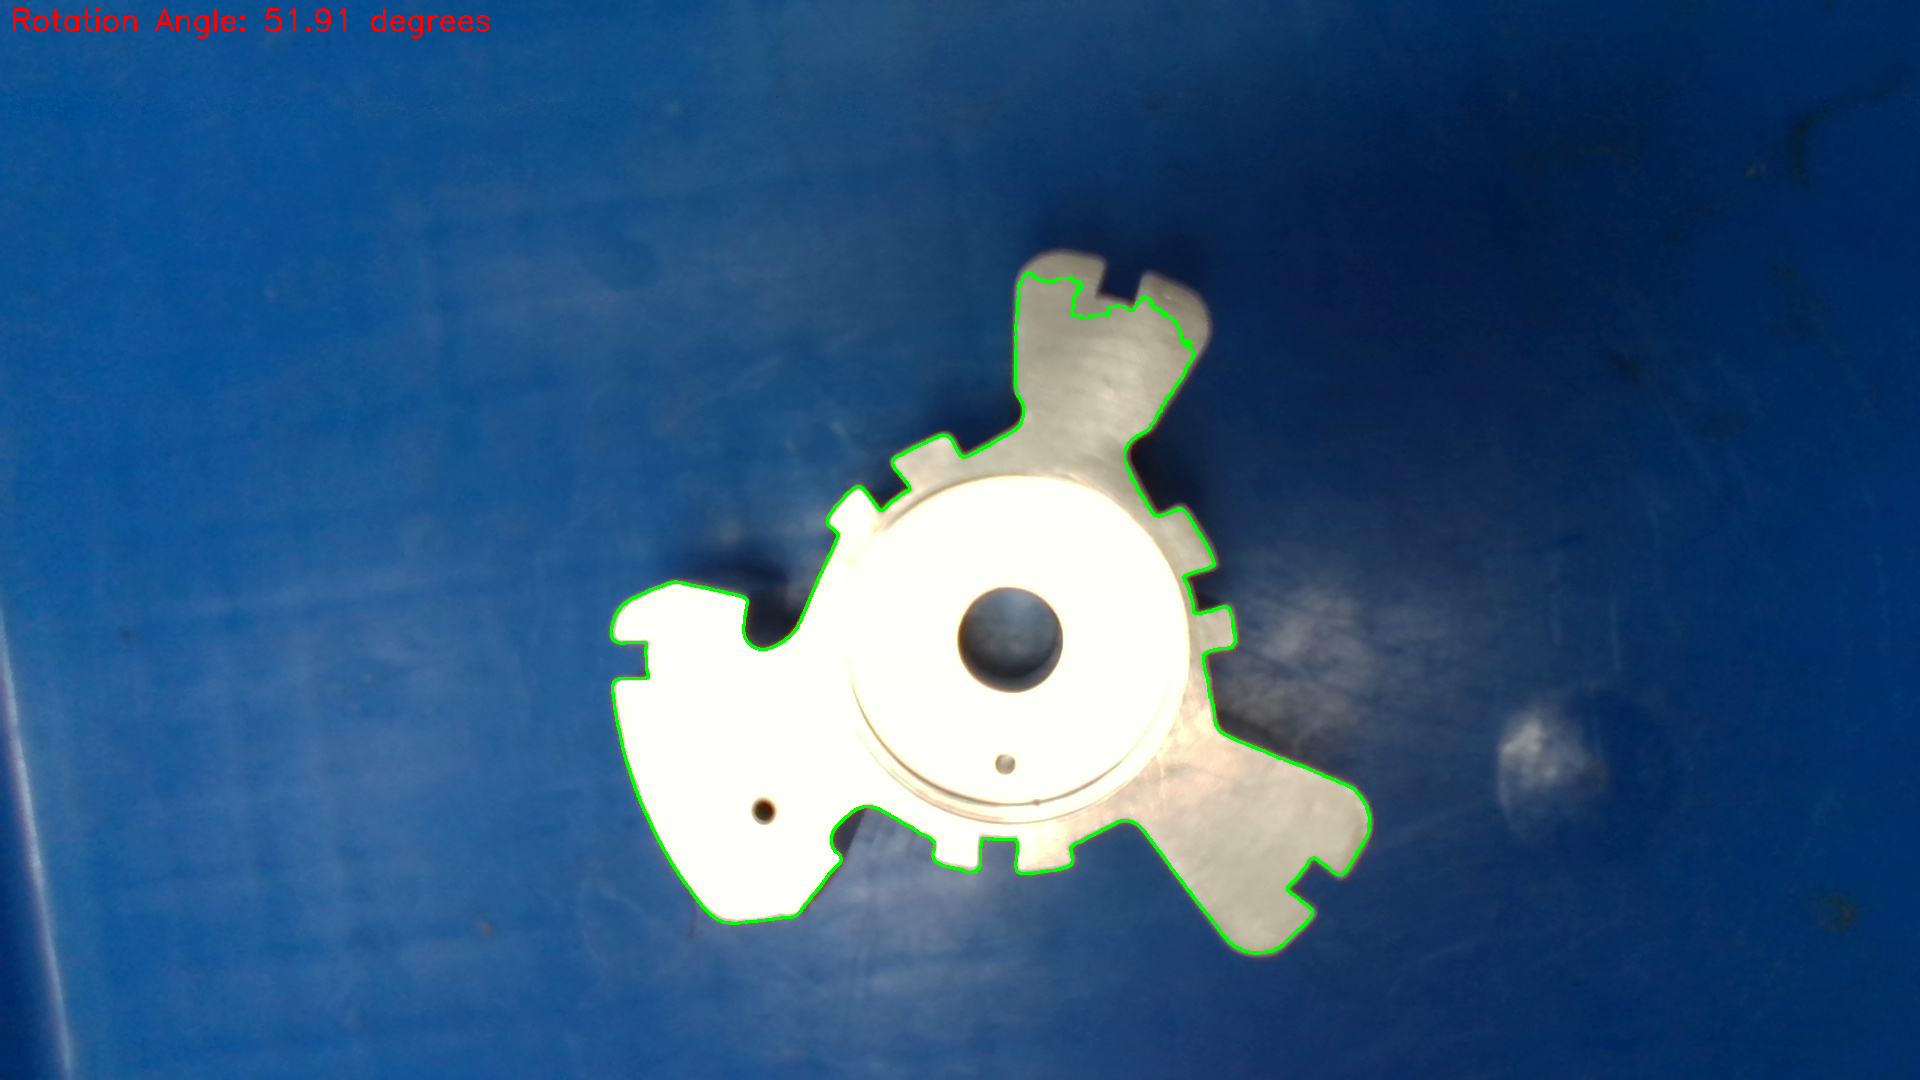

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to find rotation angle between two contours
def find_rotation_angle(template_contour, test_contour):
    # Fit bounding rectangles to contours
    template_rect = cv2.minAreaRect(template_contour)
    test_rect = cv2.minAreaRect(test_contour)

    # Get the rotation angles from the bounding rectangles
    template_angle = template_rect[-1]
    test_angle = test_rect[-1]

    # Calculate the rotation angle difference between the two contours
    rotation_angle = test_angle - template_angle
    return rotation_angle

# Read the template image and test image
template_image = cv2.imread('/content/screenshot_2024-05-02_17-23-09.jpg')
test_image = cv2.imread('/content/screenshot_2024-05-02_17-23-22.jpg')

# Convert images to grayscale
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to both images
ret_template, template_thresh = cv2.threshold(template_gray, 145, 255, cv2.THRESH_BINARY)
ret_test, test_thresh = cv2.threshold(test_gray, 145, 255, cv2.THRESH_BINARY)

# Find contours in both images
template_contours, _ = cv2.findContours(template_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
test_contours, _ = cv2.findContours(test_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a minimum contour area threshold
min_contour_area = 100000

# Find the template contour with area greater than the minimum contour area
for contour in template_contours:
    if cv2.contourArea(contour) > min_contour_area:
        template_contour = contour
        break

# Iterate over contours in the test image
for test_contour in test_contours:
    # Compute contour area and check if it is above the minimum area threshold
    test_area = cv2.contourArea(test_contour)
    if test_area > min_contour_area:
        # Find rotation angle between template and test contours
        rotation_angle = find_rotation_angle(template_contour, test_contour)

        # Draw polygon around the object in the test image
        cv2.drawContours(test_image, [test_contour], contourIdx=-1, color=(0, 255, 0), thickness=2)

        # Add text with rotation angle to the test image
        cv2.putText(test_image, f'Rotation Angle: {rotation_angle:.2f} degrees', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Draw contours on the template image
cv2.drawContours(template_image, [template_contour], contourIdx=-1, color=(0, 255, 0), thickness=2)

# Display both images
cv2_imshow(template_image)
cv2_imshow(test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
